In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df=pd.read_csv("loan_application_status.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


EDA PROCESS

In [3]:
df.drop("Loan_ID",axis=1,inplace=True)

In [4]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [7]:
df["Credit_History"]=df["Credit_History"].replace(np.NaN,1.0)

In [8]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [9]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].replace(np.NaN,360.0)

In [10]:
df["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [11]:
df["LoanAmount"]=df["LoanAmount"].replace(np.NaN,df["LoanAmount"].mean())

In [12]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
df["Self_Employed"]=df["Self_Employed"].replace(np.NaN,"No")

In [14]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
df["Dependents"]=df["Dependents"].replace(np.NaN,0)

In [16]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [17]:
df["Married"]=df["Married"].replace(np.NaN,"Yes")

In [18]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [19]:
df["Gender"]=df["Gender"].replace(np.NaN,"Male")

In [20]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

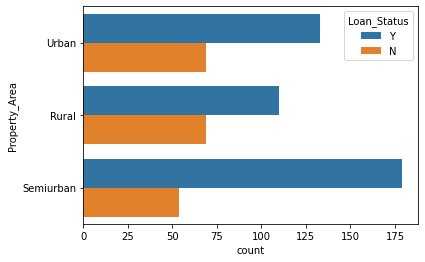

In [21]:
sns.countplot(y='Property_Area', hue='Loan_Status', data = df)

<AxesSubplot:xlabel='count', ylabel='Loan_Amount_Term'>

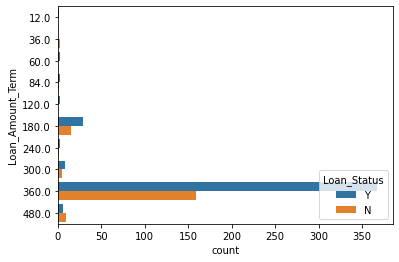

In [22]:
sns.countplot(y='Loan_Amount_Term', hue='Loan_Status', data = df)

In [23]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

LABEL ENCODER

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

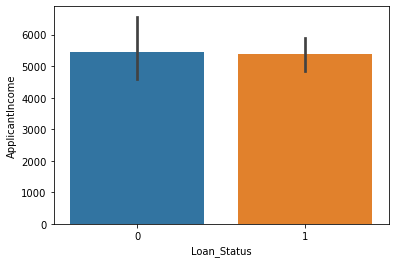

In [25]:
sns.barplot(x="Loan_Status",y="ApplicantIncome",data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='Self_Employed'>

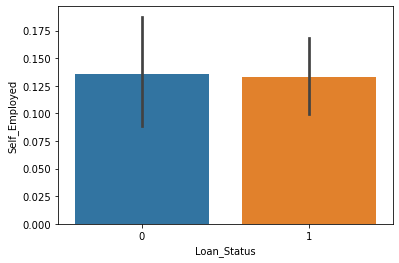

In [26]:
sns.barplot(x="Loan_Status",y="Self_Employed",data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

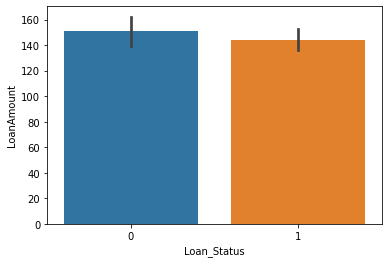

In [27]:
sns.barplot(x="Loan_Status",y="LoanAmount",data=df)

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>],
       [<AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Property_Area'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

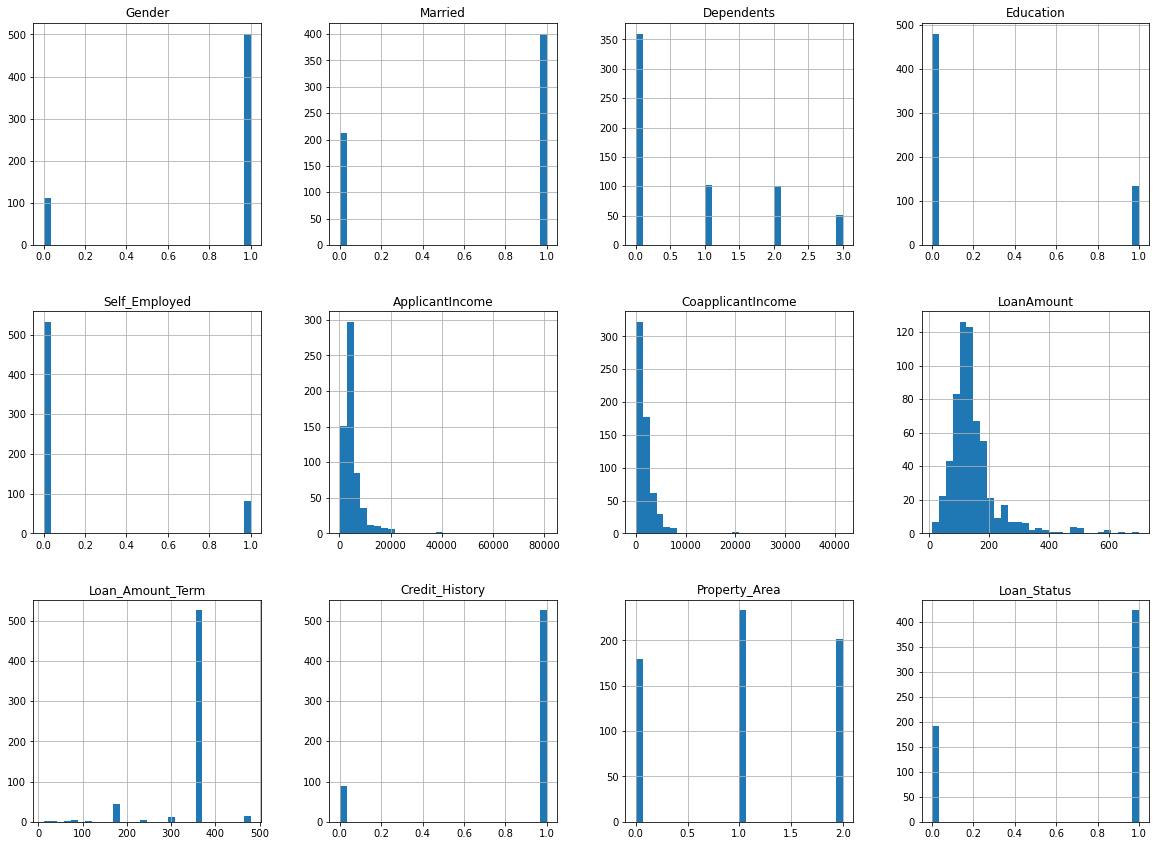

In [28]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [23]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [24]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Gender                 AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
Married              AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
Dependents           AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
Education            AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
Self_Employed        AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
ApplicantIncome      AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
CoapplicantIncome    AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
LoanAmount           AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
Loan_Amount_Term       AxesSubplot(0.125,0.703298;0.0824468x0.0803191)
Credit_History       AxesSubplot(0.223936,0.703298;0.0824468x0.0803...
Property_Area        AxesSubplot(0.322872,0.703298;0.0824468x0.0803...
Loan_Status          AxesSubplot(0.421809,0.703298;0.0824468x0.0803...
dtype: object

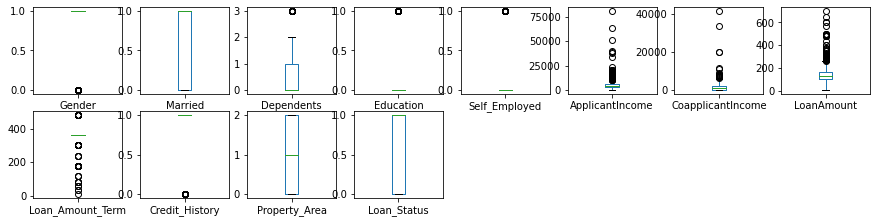

In [25]:
df.plot(kind="box",subplots=True,layout=(8,8),figsize=(15,15))

Z SCORE METHOD

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [27]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [28]:
df.shape

(614, 12)

In [29]:
577/614

0.9397394136807817

In [30]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [31]:
df_new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

BY USING LOG TRANSFORM METHOD TO REMOVE SKEWNESS

In [32]:
skew=('Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History','Loan_Status')
for col in skew:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [33]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697883
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

CORRELATION GRAPH

In [34]:
df_new.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188828,0.045696,-0.006207,0.060302,0.235133,0.177720,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.345029,0.024817,-0.015779,-0.026283,0.339399,0.186356,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188828,0.345029,1.000000,0.065629,0.056754,0.108236,0.018101,0.130287,-0.094854,-0.018182,0.021226,0.019319
Education,0.045696,0.024817,0.065629,1.000000,-0.007139,-0.174609,0.054682,-0.110204,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.056754,-0.007139,1.000000,0.207418,-0.089466,0.113287,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.060302,-0.026283,0.108236,-0.174609,0.207418,1.000000,-0.362495,0.405411,-0.070193,0.027449,-0.010603,-0.001761
CoapplicantIncome,0.235133,0.339399,0.018101,0.054682,-0.089466,-0.362495,1.000000,0.196642,0.004463,0.008071,-0.072402,0.081455
LoanAmount,0.177720,0.186356,0.130287,-0.110204,0.113287,0.405411,0.196642,1.000000,0.050208,-0.012837,-0.103225,-0.023549
Loan_Amount_Term,-0.104983,-0.127348,-0.094854,-0.090523,-0.032914,-0.070193,0.004463,0.050208,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.018182,-0.075217,-0.016390,0.027449,0.008071,-0.012837,0.027392,1.000000,-0.008121,0.560936


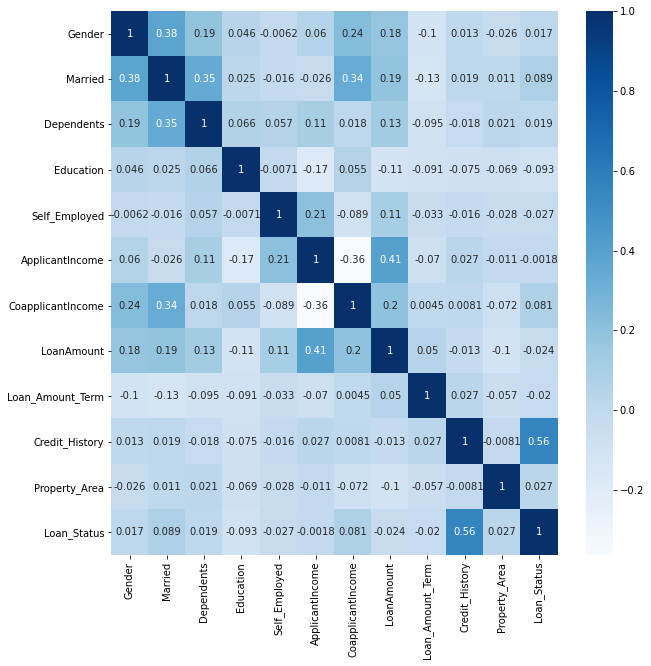

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_new.iloc[:,df_new.columns != 'Loan_Status']
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.000000,0.000000,0.000000,8.674197,0.000000,4.993232,360.0,1.0,2
1,1,1,0.693147,0.000000,0.000000,8.430327,7.319202,4.859812,360.0,1.0,0
2,1,1,0.000000,0.000000,0.693147,8.006701,0.000000,4.204693,360.0,1.0,2
3,1,1,0.000000,0.693147,0.000000,7.857094,7.765993,4.795791,360.0,1.0,2
4,1,0,0.000000,0.000000,0.000000,8.699681,0.000000,4.955827,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0.000000,0.000000,7.972811,0.000000,4.276666,360.0,1.0,0
610,1,1,1.386294,0.000000,0.000000,8.320448,0.000000,3.713572,180.0,1.0,0
611,1,1,0.693147,0.000000,0.000000,8.996280,5.484797,5.537334,360.0,1.0,2
612,1,1,1.098612,0.000000,0.000000,8.933796,0.000000,5.236442,360.0,1.0,2


In [37]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [38]:
calc_vif(x)

,variable,VIF factor
0,Gender,6.592785
1,Married,4.093303
2,Dependents,1.882572
3,Education,1.299464
4,Self_Employed,1.182287
5,ApplicantIncome,190.967166
6,CoapplicantIncome,3.285201
7,LoanAmount,189.262258
8,Loan_Amount_Term,40.843414
9,Credit_History,6.707791


In [39]:
df_new["Loan_Status"].value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

SMOTE PROCESS -as our target column is imbalanced

In [40]:
dfx=df_new.iloc[:,df_new.columns != 'Loan_Status']
dfx

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.000000,0.000000,0.000000,8.674197,0.000000,4.993232,360.0,1.0,2
1,1,1,0.693147,0.000000,0.000000,8.430327,7.319202,4.859812,360.0,1.0,0
2,1,1,0.000000,0.000000,0.693147,8.006701,0.000000,4.204693,360.0,1.0,2
3,1,1,0.000000,0.693147,0.000000,7.857094,7.765993,4.795791,360.0,1.0,2
4,1,0,0.000000,0.000000,0.000000,8.699681,0.000000,4.955827,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0.000000,0.000000,7.972811,0.000000,4.276666,360.0,1.0,0
610,1,1,1.386294,0.000000,0.000000,8.320448,0.000000,3.713572,180.0,1.0,0
611,1,1,0.693147,0.000000,0.000000,8.996280,5.484797,5.537334,360.0,1.0,2
612,1,1,1.098612,0.000000,0.000000,8.933796,0.000000,5.236442,360.0,1.0,2


In [41]:
dfy=df_new.iloc[:,-1]
dfy

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [42]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)

In [43]:
trainx.value_counts()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
1       1        1.386294    0.693147   0.693147       8.648923         0.000000           4.875197    360.0             1.000000        0                1
        0        0.000000    0.377713   0.000000       7.736225         3.967436           4.418184    480.0             0.000000        1                1
                             0.247090   0.000000       8.822690         0.000000           4.710619    360.0             0.356476        0                1
                             0.209556   0.000000       8.791809         0.000000           4.784162    360.0             0.302326        0                1
                             0.083908   0.000000       8.117840         0.000000           4.466934    360.0             1.000000        2                1
                                                                     

In [44]:
trainy.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

STANDARD SCALER

In [45]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
trainx=scale.fit_transform(trainx)

In [46]:
trainx

array([[ 0.48384763, -1.25873571, -0.77292715, ...,  0.23485476,
         0.57520122,  1.24387901],
       [ 0.48384763,  0.79444795,  0.59483854, ...,  0.23485476,
         0.57520122, -1.2723286 ],
       [ 0.48384763,  0.79444795, -0.77292715, ...,  0.23485476,
         0.57520122,  1.24387901],
       ...,
       [ 0.48384763, -1.25873571, -0.7539292 , ...,  0.23485476,
        -1.85953465, -1.2723286 ],
       [ 0.48384763,  0.79444795, -0.77292715, ...,  0.23485476,
        -1.85953465,  1.24387901],
       [-2.06676636, -1.25873571, -0.77292715, ...,  0.23485476,
         0.57520122, -0.01422479]])

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [87]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=i) 
    m=DecisionTreeClassifier()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=accuracy_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.8158995815899581 on random state 17


In [88]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=17)

In [89]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",accuracy_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    print(confusion_matrix(pred_test,y_test))
    print(classification_report(pred_test,y_test),"\n")

testing score= 0.7364016736401674
training score= 0.7504488330341114
[[ 68  24]
 [ 39 108]]
              precision    recall  f1-score   support

           0       0.64      0.74      0.68        92
           1       0.82      0.73      0.77       147

    accuracy                           0.74       239
   macro avg       0.73      0.74      0.73       239
weighted avg       0.75      0.74      0.74       239
 

testing score= 0.8200836820083682
training score= 1.0
[[ 90  26]
 [ 17 106]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       116
           1       0.80      0.86      0.83       123

    accuracy                           0.82       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.82      0.82      0.82       239
 

testing score= 0.7405857740585774
training score= 0.8150807899461401
[[ 70  25]
 [ 37 107]]
              precision    recall  f1-score   support

           0       0.65   

CROSS VALIDATION PROCESS

In [90]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    score=cross_val_score(i,trainx,trainy,cv=10) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.725      0.6375     0.7125     0.7375     0.75       0.8
 0.86075949 0.75949367 0.73417722 0.75949367]
mean_score= 0.7476424050632913
std= 0.054759887684608106 

score= [0.7375     0.7125     0.7125     0.7875     0.7875     0.7875
 0.84810127 0.67088608 0.75949367 0.65822785]
mean_score= 0.7461708860759494
std= 0.05606782308178718 

score= [0.7125     0.7125     0.7625     0.7        0.725      0.825
 0.87341772 0.6835443  0.7721519  0.7721519 ]
mean_score= 0.7538765822784809
std= 0.05674343827804378 

score= [0.7875     0.7375     0.7625     0.7125     0.8125     0.9375
 0.92405063 0.86075949 0.97468354 0.81012658]
mean_score= 0.8319620253164558
std= 0.08465751785443602 

score= [0.7875     0.675      0.725      0.7375     0.8        0.725
 0.82278481 0.69620253 0.81012658 0.74683544]
mean_score= 0.7525949367088607
std= 0.04763106080966022 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
parameter={"bootstrap": [True,False],
          "criterion": ["gini","entropy"],
          "warm_start": [True,False],
          "max_features": ["auto","sqrt","log2"]}

In [94]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [95]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]})

In [96]:
gcv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 'log2',
 'warm_start': False}

In [97]:
final_model=RandomForestClassifier(bootstrap=True,criterion="entropy",max_features='log2',warm_start=False)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(pred,y_test))

0.8368200836820083


AUC-ROC CURVE

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [100]:
y_pred_prob=final_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.01, 0.87, 0.62, 0.05, 0.66, 0.59, 0.61, 0.06, 0.04, 0.92, 0.79,
       0.98, 0.64, 0.34, 0.08, 0.79, 0.02, 0.99, 0.05, 0.96, 0.85, 0.46,
       0.03, 0.03, 0.46, 0.8 , 0.84, 0.5 , 0.97, 0.04, 0.81, 0.04, 0.89,
       0.75, 0.77, 0.55, 0.46, 0.65, 0.59, 0.89, 0.06, 0.21, 0.9 , 0.37,
       0.6 , 0.74, 0.76, 0.07, 0.74, 0.83, 0.  , 0.36, 0.52, 0.04, 0.55,
       0.94, 0.76, 0.07, 0.73, 0.89, 0.47, 0.06, 0.08, 0.  , 0.95, 0.68,
       0.75, 0.36, 0.84, 0.03, 0.03, 0.62, 0.1 , 0.8 , 0.64, 0.78, 0.76,
       0.03, 0.08, 0.67, 0.7 , 1.  , 0.79, 0.24, 0.74, 0.01, 0.56, 0.21,
       0.5 , 0.79, 0.08, 0.32, 0.28, 0.07, 0.24, 0.55, 0.  , 0.61, 0.46,
       0.78, 0.76, 0.17, 0.55, 0.64, 0.04, 0.77, 0.76, 0.85, 0.02, 0.05,
       0.89, 0.21, 0.95, 0.77, 0.39, 0.39, 0.96, 0.03, 0.1 , 0.75, 0.11,
       0.14, 0.76, 0.62, 0.06, 0.64, 0.85, 0.03, 0.88, 0.82, 0.04, 0.14,
       0.41, 0.36, 0.74, 0.31, 0.86, 0.59, 0.06, 0.85, 0.7 , 0.02, 0.22,
       0.24, 0.75, 0.78, 0.13, 0.05, 0.12, 0.78, 0.

In [101]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

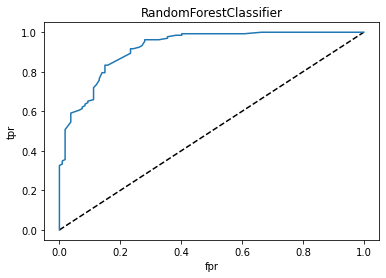

In [102]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("RandomForestClassifier")
plt.show()

In [104]:
auc_score=roc_auc_score(y_test,y_pred_prob)
auc_score

0.9211979609175871

SAVING THE BEST MODEL

In [105]:
import joblib

joblib.dump(final_model,"loan_app_status.obj")

['loan_app_status.obj']

In [106]:
loanappstatus_from_joblib=joblib.load("loan_app_status.obj")
loanappstatus_from_joblib.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])